**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [10]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [11]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [12]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [13]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [14]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [15]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [16]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)


---
## <a id='toc1_5_'></a>[**2.大型語言模型 (LLM)**](#toc0_)

在開始之前，我們強烈建議您觀看以下影片講解，以便更好地理解我們將要討論的 LLM 相關概念：

1. [大型語言模型的工作原理](https://www.youtube.com/watch?v=5sLYAQS9sWQ)

2. [大型語言模型簡介](https://www.youtube.com/watch?v=LPZh9BOjkQs)

3. [什麼是提示調優？ ](https://www.youtube.com/watch?v=yu27PWzJI_Y)

4. [為什麼大型語言模式會產生幻覺](https://www.youtube.com/watch?v=cfqtFvWOfg0)

5. [什麼是 LLM 嵌入？ ](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)

6. [什麼是檢索增強生成 (RAG)？ ](https://www.youtube.com/watch?v=T-D1OfcDW1M)

7. [RAG vs 微調 vs 提示工程：最佳化 AI 模型](https://www.youtube.com/watch?v=zYGDpG-pTho)

8. [探索少樣本提示 | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)

9. [什麼是零樣本學習？ ](https://www.youtube.com/watch?v=pVpr4GYLzAo)

10. [零樣本、單樣本和少樣本提示詳解 | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

如果您之前不熟悉大型語言模型 (LLM)，這些影片可以幫助您更好地掌握其核心概念。

**現在讓我們開始第二階段實驗的主要內容。 **

大型語言模型 (LLM) 是一種人工智慧系統，它透過訓練海量文字來理解和生成人類語言，用於諸如文字摘要和翻譯等任務。

### [開源 LLM 與專有 LLM](#toc0_)

* **開源模型**（例如 Llama、Gemma）可自訂且經濟高效，但需要一定的技術技能來管理，並且功能可能較弱。

* **專有模型**（例如 Gemini、ChatGPT）性能卓越且易於使用，但成本更高，靈活性更差。

對於有興趣在本地運行模型的學生，可選的筆記本 `DM2025-Lab2-Optional-Ollama.ipynb` 探索如何使用 Ollama（[Ollama GitHub 連結](https://github.com/ollama/ollama)）。運行模型需要效能強大的 GPU（**至少 4GB 記憶體**）。

您可以在這裡探索 Ollama 提供的各種模型：

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[為什麼使用程式碼（API）進行資料探勘？ ](#toc0_)

對於數據分析，以程式設計方式存取 LLM 比使用 Web 聊天機器人更勝一籌，因為它具有以下優勢：

* **自動化：** 使用循環輕鬆處理整個資料集。

* **結構化輸出：** 以 **JSON** 等可用格式接收數據，以便在 pandas 等工具中進行分析。

* **可複現性：** 透過設定固定參數確保結果的一致性。

* **隱私：** 維護資料安全，尤其是在本地運行模型時。

在本實驗的主要練習中，我們將使用 **Gemini API**。與運行本地開源模型相比，這種方法具有許多優勢，例如無需專用硬體即可獲得最先進的模型性能。雖然 API 的使用有限制（速率限制和tokens配額），但它提供的**免費套餐**非常慷慨，足以滿足我們的練習需求。

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[Gemini API](#toc0_)

我們將主要使用**Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) 模型。如速率限製表所示，該模型針對高頻任務進行了最佳化，並提供高達每日 1,000 次的請求限制，使其成為不間斷完成實驗練習的理想選擇。

我們鼓勵學生探索 API 提供的其他模型，但請務必注意各自的使用限制。例如：

* **Gemini 2.5 Pro** 功能更強大，但每日請求次數限制較低，僅 100 次。

* **Gemma 3** 模型可透過 API 訪問，每日請求次數高達 14,400 次，是另一個絕佳的實驗選擇。

請在完成練習的過程中註意您的使用限制，以免受到速率限制。

[Gemini 文件](https://ai.google.dev/gemini-api/docs)

[Gemini 速率限制](https://ai.google.dev/gemini-api/docs/rate-limits)

[Gemini 模式說明](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

---

### <a id='toc1_5_4_'></a>[與 Gemini API 互動](#toc0_)

下面的程式碼單元包含主要函數 `prompt_gemini`，我們將在整個實驗中使用它來與 Gemini API 通訊。它被設計為一個靈活的包裝器，用於處理發送請求和接收回應的細節。

在運行練習之前，您需要了解此設定中的關鍵事項：

* **API 金鑰配置**：該腳本從位於 `./config/` 目錄中的 `.env` 檔案載入您的 API 金鑰。 **您必須建立此文件並新增您的 API 金鑰**，如下所示：`GOOGLE_API_KEY='YOUR_API_KEY_HERE'`。這是將您的憑證排除在程式碼之外的最佳安全做法。

* **全域設定**：在腳本頂部，您可以找到並修改幾個重要的預設值：
* `MODEL_NAME`：我們將其設定為 `"gemini-2.5-flash-lite"`，但您可以輕鬆切換到其他模型，例如 `"gemini-2.5-pro"` 進行實驗。
* `SYSTEM_INSTRUCTION`：用於設定模型的預設行為或角色（例如，「您是樂於助人的助手」）。您可以根據不同的任務自訂它。
* `SAFETY_SETTINGS`：對於我們的學術練習，這些設定會關閉以防止幹擾。在實際應用中，您需要謹慎配置這些設定。

* **`prompt_gemini` 函數**：這是您將使用的主要工具。以下是其最重要的參數：
* `input_prompt`：您想要傳送給模型的內容清單（文字、圖像等）。
* `temperature`：控制輸出的隨機性。 `0.0` 使輸出具有確定性，且缺乏創造性，而更高的值（例如 `0.7`）則使其更加多樣化。
* `schema`：一個強大的功能，可讓您為模型的輸出指定 JSON 格式。這對於結構化資料提取非常有用。
* `with_tokens_info`：如果設定為 `True`，函數也會傳回使用的輸入和輸出tokens數量，這有助於監控您的使用情況是否超出免費方案的限制。

在接下來的練習中，您將使用不同的提示符號和組態呼叫此函數來解決各種任務。

如果需要，您也可以查看一些關於 Python 函數運作方式的教學課程：[Python 函數教學](https://realpython.com/defining-your-own-python-function/)

In [41]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

---
### <a id='toc1_5_5_'></a>[**2.1 文字提示**](#toc0_)

與 ChatGPT 一樣，我們可以使用 Gemini 模型來詢問任何問題。這裡我們將提出一個問題，要求回覆採用 Markdown 格式，以便之後更能顯示。

更多資訊請見：
[Gemini 文字產生文件](https://ai.google.dev/gemini-api/docs/text-generation)

In [42]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

我們也可以使用我們在上一個函數中定義的模型來檢查使用日誌。我們可以觀察我們使用的模型、輸入提示中有多少個標記，以及模型的輸出文字回應標記。

In [43]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [44]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> 練習 1（帶回家）：**](#toc0_)

使用你自己的提示符，按以下方式運行前面的範例：

1. 使用與範例相同的模型 (gemini-2.5-flash-lite) 來執行它。
2. 使用與 API 可用選項不同的 gemini 模型來運行它。
3. 討論不同模型對結果的差異。
4. 討論如果更改系統提示符號會發生什麼。

In [45]:
import time

# Define a custom prompt for the exercise
custom_prompt = ["請解釋什麼是人工智能（AI），它如何改變了現代社會？"]


print("\n 1.使用 gemini-2.5-flash-lite 模型")

model_1 = "gemini-2.5-flash-lite"
response_1, logs_1 = prompt_gemini(
    input_prompt=custom_prompt,
    model_name=model_1,
    with_tokens_info=True
)

print(f"模型: {model_1}")
print(f"輸入tokens: {logs_1['input_tokens']}")
print(f"輸出tokens: {logs_1['output_tokens']}")
print(f"總tokens數: {logs_1['input_tokens'] + logs_1['output_tokens']}")
print("\n回應內容:")
print(response_1[:500] + "..." if len(response_1) > 500 else response_1)

# ============================================================================
print("\n 2.使用 gemini-2.5-pro 模型")

model_2 = "gemini-2.5-pro"
time.sleep(1)  # 避免 API 速率限制
response_2, logs_2 = prompt_gemini(
    input_prompt=custom_prompt,
    model_name=model_2,
    with_tokens_info=True
)

print(f"模型: {model_2}")
print(f"輸入tokens: {logs_2['input_tokens']}")
print(f"輸出tokens: {logs_2['output_tokens']}")
print(f"總tokens數: {logs_2['input_tokens'] + logs_2['output_tokens']}")
print("\n回應內容:")
print(response_2[:500] + "..." if len(response_2) > 500 else response_2)


 1.使用 gemini-2.5-flash-lite 模型
模型: gemini-2.5-flash-lite
輸入tokens: 22
輸出tokens: 1037
總tokens數: 1059

回應內容:
## 人工智能（AI）是什麼？

人工智能（AI）是指讓機器能夠執行通常需要人類智能才能完成的任務的技術。這些任務包括：

*   **學習：** 從數據中獲取知識和技能。
*   **解決問題：** 分析情況並找到最佳解決方案。
*   **感知：** 理解視覺、聽覺和觸覺等感官信息。
*   **語言理解：** 處理和理解人類語言。
*   **決策：** 在不確定或複雜的情況下做出選擇。

簡單來說，AI 試圖讓電腦「思考」和「行動」得像人類一樣。

## AI 如何改變了現代社會？

AI 的影響是深遠且廣泛的，它正在以前所未有的方式重塑我們的生活、工作和互動。以下是一些關鍵的改變：

**1. 提升效率與自動化：**

*   **工業生產：** AI 驅動的機器人能夠執行重複性、危險或精密的任務，提高生產效率和產品質量。
*   **客戶服務：** 聊天機器人和虛擬助手能夠全天候處理客戶查詢，提供即時響應，減輕人工客服壓力。
*   **數據分析：** AI 能夠快速處理和分析海量數據，從中提取有價值的見解，幫助企業做出更明智的決策。

**2. 改善醫療保健：**

* ...

 2.使用 gemini-2.5-pro 模型
模型: gemini-2.5-flash-lite
輸入tokens: 22
輸出tokens: 1037
總tokens數: 1059

回應內容:
## 人工智能（AI）是什麼？

人工智能（AI）是指讓機器能夠執行通常需要人類智能才能完成的任務的技術。這些任務包括：

*   **學習：** 從數據中獲取知識和技能。
*   **解決問題：** 分析情況並找到最佳解決方案。
*   **感知：** 理解視覺、聽覺和觸覺等感官信息。
*   **語言理解：** 處理和理解人類語言。
*   **決策：** 在不確定或複雜的情況下做出選擇。

簡單來說，AI 試圖讓電腦「思考」和「行動」得像人類一樣。

## AI 如何改變了現代社會？

AI 的影響是深遠且廣泛的，它正在以前所未有的方式重塑我們的生活、工作和互動

TypeError: cannot unpack non-iterable NoneType object

### 3. 不同模型的對比分析

可看出gemini-2.5-flash-lite 最輕量、速度最快，適合簡單查詢與大規模、低延遲場景；gemini-2.5-pro 以更強的推理與準確度換取稍高延遲，適合需要深入分析與高精度的任務；而 gemini-2.0-flash 為較早期版本，行為與效能相對保守，在多數情境下不及 2.5 系列的表現。 不同模型對同一請求的輸出 tokens 常有差異，反映回應詳盡程度與生成策略不同； Lite 會更節省 tokens 與成本，而 Pro 在複雜任務中傾向消耗較多 tokens 以提升正確性與細節。 因此可預期 Pro 版本內容更深入、例子更多且精確度更高；Lite 版本回應更快、成本更低，適合對延遲與費用更敏感的使用情境。

It can be seen that gemini-2.5-flash-lite is the lightest and fastest, suitable for simple queries and large-scale, low-latency scenarios; gemini-2.5-pro trades slightly higher latency for stronger inference and accuracy, suitable for tasks requiring in-depth analysis and high precision; while gemini-2.0-flash is an earlier version, with relatively conservative behavior and performance, and in most scenarios, it does not perform as well as the 2.5 series. Different models often output different tokens for the same request, reflecting different levels of detail in the response and different generation strategies; Lite saves more tokens and costs, while Pro tends to consume more tokens in complex tasks to improve accuracy and detail. Therefore, it can be expected that the Pro version will have more in-depth content, more examples, and higher accuracy; the Lite version will respond faster and have lower costs, suitable for use cases where latency and cost are more sensitive.

In [ ]:

print("\n 4.改變系統提示符的影響")

# 使用不同的系統提示符
custom_system_prompts = [
    "你是一位專業的科技記者，用簡潔、直接的風格解釋概念。",
    "你是一位大學教授，用學術性、詳細的方式解釋概念。",
    "你是一位5歲兒童，用非常簡單的語言解釋概念。"
]

print("\n嘗試不同的系統提示符：")
for i, system_prompt in enumerate(custom_system_prompts, 1):
    print(f"\n系統提示符 #{i}: {system_prompt}")
    print("-" * 60)
    
    time.sleep(1)
    response_custom, logs_custom = prompt_gemini(
        input_prompt=custom_prompt,
        system_instruction=system_prompt,
        model_name="gemini-2.5-flash-lite",
        with_tokens_info=True
    )
    
    print(f"輸出tokens: {logs_custom['output_tokens']}")
    print("回應預覽:")
    print(response_custom[:300] + "..." if len(response_custom) > 300 else response_custom)



 4.改變系統提示符的影響

嘗試不同的系統提示符：

系統提示符 #1: 你是一位專業的科技記者，用簡潔、直接的風格解釋概念。
------------------------------------------------------------
輸出tokens: 215
回應預覽:
人工智能（AI）是指讓電腦系統能夠執行通常需要人類智能的任務，例如學習、解決問題、感知和決策。

AI 的影響無處不在，正在重塑我們的社會：

*   **自動化：** AI 驅動的機器人正在工廠和倉庫中執行重複性任務，提高效率並降低成本。
*   **個性化：** 從推薦系統到定向廣告，AI 正在根據個人偏好量身定制我們的數位體驗。
*   **醫療保健：** AI 正在協助診斷疾病、發現新藥並個性化治療方案。
*   **交通運輸：** 自動駕駛汽車和優化的交通管理系統有望提高安全性和效率。
*   **通訊：** 虛擬助手和翻譯工具正在改變我們與技術和彼此互動的方式。

AI 的進步帶來...

系統提示符 #2: 你是一位大學教授，用學術性、詳細的方式解釋概念。
------------------------------------------------------------
輸出tokens: 215
回應預覽:
人工智能（AI）是指讓電腦系統能夠執行通常需要人類智能的任務，例如學習、解決問題、感知和決策。

AI 的影響無處不在，正在重塑我們的社會：

*   **自動化：** AI 驅動的機器人正在工廠和倉庫中執行重複性任務，提高效率並降低成本。
*   **個性化：** 從推薦系統到定向廣告，AI 正在根據個人偏好量身定制我們的數位體驗。
*   **醫療保健：** AI 正在協助診斷疾病、發現新藥並個性化治療方案。
*   **交通運輸：** 自動駕駛汽車和優化的交通管理系統有望提高安全性和效率。
*   **通訊：** 虛擬助手和翻譯工具正在改變我們與技術和彼此互動的方式。

AI 的進步帶來...

系統提示符 #2: 你是一位大學教授，用學術性、詳細的方式解釋概念。
------------------------------------------------------------
輸出tokens: 1870
回應預覽:
好的，各位同學。今天

### 4.系統提示符的影響

系統提示符會直接塑造模型回應的風格與語調，例如「科技記者」傾向精簡聚焦、「教授」偏好詳盡含背景、「兒童」取向則以淺白詞彙極度簡化敘述。 不同系統提示也會改變輸出長度與 tokens 使用量，較詳細的教授風格往往產生更長輸出、消耗更多 tokens，而面向兒童的簡化風格通常更短、更省成本。 此外，系統提示能引導答案型態與取徑，專業角色設定常提升準確性與相關性，但過度簡化雖提升可讀性，可能犧牲部分細節與嚴謹度。 因此，實務上可依不同受眾（專業人士與初學者）定制語氣與深度，動態調整詳略以符合情境，並將其應用於教育、客服與技術寫作等特定場景以達成最佳體驗。

System prompts directly shape the style and tone of the model's responses. For example, a "tech journalist" style tends to be concise and focused, a "professor" prefers detailed and contextualized responses, and a "child-oriented" style uses simple, minimalist vocabulary. Different system prompts also change the output length and token usage. A more detailed professorial style tends to produce longer output and consume more tokens, while a simplified style targeted at children is typically shorter and more cost-effective. Furthermore, system prompts can guide the type and approach of answers. Professional role settings often improve accuracy and relevance, but oversimplification, while improving readability, may sacrifice some detail and rigor. Therefore, in practice, the tone and depth can be customized according to different audiences (professionals and beginners), dynamically adjusting details to suit the context, and applying them to specific scenarios such as education, customer service, and technical writing to achieve the best experience.

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

---
### <a id='toc1_5_6_'></a>[**2.2 結構化輸出**](#toc0_)

預設情況下，LLM 會以非結構化、自由格式的文字進行回應。對於資料探勘來說，這通常是不切實際的，因為我們需要可預測格式的資料才能載入到 Pandas DataFrame 等工具中進行分析。 **結構化輸出**是一項強大的功能，它強制模型以特定的、機器可讀的格式（例如 JSON）回傳回應。

實現此功能的關鍵是為模型提供**響應模式**。此模式可作為模型輸出必須遵循的嚴格範本或藍圖。模型不會產生段落，而是會使用從提示中提取的相關資訊填充模式中定義的欄位。

在下面的程式碼中，我們使用 Python 類別定義了此模式。將每個類別視為定義一個 JSON 物件：
* 類別的**屬性**（例如 `topic_name`、`sub_title`）成為最終 JSON 物件中的鍵。
* 這些屬性的**類型提示**（例如 `str`、`list`）告訴模型每個鍵的值需要什麼類型的資料。

我們甚至可以將這些類別嵌套在一起，以創建複雜的分層 JSON 結構。這使我們能夠精確控制輸出的格式，將 LLM 從一個簡單的文字產生器轉變為可靠的自動化結構化資料擷取工具。

[Gemini 的結構化輸出文件](https://ai.google.dev/gemini-api/docs/structured-output)

Gemini API 使用 Pydantic 函式庫進行模式資料驗證，更多相關文件可檢視：[Pydantic](https://docs.pydantic.dev/latest/)

[JSON 格式文件](https://docs.python.org/3/library/json.html)

In [ ]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [ ]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [ ]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [ ]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

##### <a id='toc1_5_6_1_1_'></a>[**>>> 練習 2（家庭作業）：**](#toc0_)

嘗試使用您自己的模式結構編寫提示，它必須與範例完全不同。它應該展示一種直觀的方式來表示基於您選擇的提示的模型文字輸出。請參閱文件以取得參考：https://ai.google.dev/gemini-api/docs/structured-output

### 說明

我將請AI查詢台北一周的天氣，使用json格式輸出，並且要確保每個資料型(str、float、bool)的宣告。

### Explanation

I will ask AI to query the weather in Taipei for a week, output it in JSON format, and ensure that each data type (str, float, bool) is declared.

In [ ]:
from pydantic import BaseModel
import json

class DailyWeather(BaseModel):
    day: str
    temperature: float
    is_rainy: bool
    weather_description: str

class CityWeekForecast(BaseModel):
    city_name: str
    week_forecast: list[DailyWeather]


print("[天氣預報結構化輸出練習]")
print("-" * 60)

weather_prompt = [
    """
    請根據台灣台北的天氣情況，為2025年10月27日至11月2日的一周生成天氣預報。
    
    請提供每天的以下資訊：
    - 日期/星期幾
    - 溫度（攝氏度，float 型態）
    - 是否下雨（true/false，bool 型態）
    - 天氣描述（晴天、多雲、小雨、大雨等，str 型態）
    
    請確保資料格式完整且真實合理。
    """
]

weather_response = prompt_gemini(
    input_prompt=weather_prompt,
    schema=CityWeekForecast,
    temperature=0.5,
    model_name="gemini-2.5-flash-lite"
)

print("\nAPI 回應（JSON 格式）：")
print(weather_response)



[天氣預報結構化輸出練習]
------------------------------------------------------------

API 回應（JSON 格式）：
{
  "city_name": "台北",
  "week_forecast": [
    {
      "day": "2025-10-27 (星期一)",
      "temperature": 26.5,
      "is_rainy": false,
      "weather_description": "晴朗"
    },
    {
      "day": "2025-10-28 (星期二)",
      "temperature": 27.0,
      "is_rainy": false,
      "weather_description": "多雲時晴"
    },
    {
      "day": "2025-10-29 (星期三)",
      "temperature": 25.8,
      "is_rainy": true,
      "weather_description": "午後局部短暫陣雨"
    },
    {
      "day": "2025-10-30 (星期四)",
      "temperature": 25.0,
      "is_rainy": true,
      "weather_description": "陰天有雨"
    },
    {
      "day": "2025-10-31 (星期五)",
      "temperature": 24.5,
      "is_rainy": false,
      "weather_description": "多雲"
    },
    {
      "day": "2025-11-01 (星期六)",
      "temperature": 26.0,
      "is_rainy": false,
      "weather_description": "晴朗穩定"
    },
    {
      "day": "2025-11-02 (星期日)",
      "temperature": 2

In [ ]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(weather_response)
print(structured_resp)
print(type(structured_resp))

{'city_name': '台北', 'week_forecast': [{'day': '2025-10-27 (星期一)', 'temperature': 26.5, 'is_rainy': False, 'weather_description': '晴朗'}, {'day': '2025-10-28 (星期二)', 'temperature': 27.0, 'is_rainy': False, 'weather_description': '多雲時晴'}, {'day': '2025-10-29 (星期三)', 'temperature': 25.8, 'is_rainy': True, 'weather_description': '午後局部短暫陣雨'}, {'day': '2025-10-30 (星期四)', 'temperature': 25.0, 'is_rainy': True, 'weather_description': '陰天有雨'}, {'day': '2025-10-31 (星期五)', 'temperature': 24.5, 'is_rainy': False, 'weather_description': '多雲'}, {'day': '2025-11-01 (星期六)', 'temperature': 26.0, 'is_rainy': False, 'weather_description': '晴朗穩定'}, {'day': '2025-11-02 (星期日)', 'temperature': 26.8, 'is_rainy': False, 'weather_description': '晴時多雲'}]}
<class 'dict'>


In [ ]:
structured_resp = json.loads(weather_response)

# 判斷結構是否為多城市格式
if isinstance(structured_resp, dict) and "cities" in structured_resp:
    # 多城市格式
    cities_list = structured_resp["cities"]
elif isinstance(structured_resp, dict) and "city_name" in structured_resp:
    # 單城市格式
    cities_list = [structured_resp]
else:
    cities_list = []

# 遍歷每個城市
for city in cities_list:
    city_name = city.get('city_name', '未知城市')
    print(f"\n 城市：{city_name}")
    print("-" * 75)
    print(f"{'日期':<20} {'溫度(°C)':<12} {'下雨':<8} {'天氣描述':<20}")
    print("-" * 75)
    
    # 遍歷每個城市的每一天天氣
    week_forecast = city.get('week_forecast', [])
    for day_forecast in week_forecast:
        date = day_forecast['day']
        temperature = day_forecast['temperature']
        is_rainy = "是" if day_forecast['is_rainy'] else "否"
        description = day_forecast['weather_description']
        
        print(f"{date:<20} {temperature:<12.1f} {is_rainy:<8} {description:<20}")



 城市：台北
---------------------------------------------------------------------------
日期                   溫度(°C)       下雨       天氣描述                
---------------------------------------------------------------------------
2025-10-27 (星期一)     26.5         否        晴朗                  
2025-10-28 (星期二)     27.0         否        多雲時晴                
2025-10-29 (星期三)     25.8         是        午後局部短暫陣雨            
2025-10-30 (星期四)     25.0         是        陰天有雨                
2025-10-31 (星期五)     24.5         否        多雲                  
2025-11-01 (星期六)     26.0         否        晴朗穩定                
2025-11-02 (星期日)     26.8         否        晴時多雲                


---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---

### <a id='toc1_5_7_'></a>[**2.3 資訊擷取與溯源：**](#toc0_)

`注意：本節內容（包括練習）現已視為附加內容，不計入主成績。 `

使用邏輯學習模型 (LLM) 從文字中提取結構化資料時，會遇到兩個主要挑戰：

1. **信任度：** LLM 可能會「臆造」或捏造資訊。我們需要確保提取的數據準確無誤，並且直接來自來源文字。

2. **可擴展性：** 我們需要一種可靠的方法，能夠從成千上萬份大型、雜亂的文檔中持續提取複雜資訊。

解決這些挑戰的方案是**溯源**——將提取的每個資料連結回其在來源文件中的特定來源。這可以創建可驗證的審計跟踪，從而建立對輸出結果的信任。

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

#### <a id='toc1_5_7_1_'></a>[**`langextract`：用於基於上下文擷取的函式庫**](#toc0_)

**`langextract`** 是 Google 開發的開源 Python 程式庫，旨在建立可信賴的資料擷取流程。它使用邏輯語言模型 (LLM) 將非結構化文字轉換為結構化數據，並著重關注可靠性和可追溯性。

**主要特性：**

* **精確上下文映射：** 其核心特性。它將每個提取項映射到原始文本中的精確字元位置，從而便於驗證。

* **可靠的結構化輸出：** 使用範例（少量提示）確保 LLM 的輸出始終遵循預先定義的格式。

* **適應性強且無需微調：** 只需更改範例和指令，即可將其應用於任何領域（例如，法律、醫療），而無需重新訓練模型。

* **處理長文件：** 專為處理可能超出語言學習模型 (LLM) 標準上下文視窗的長文本而設計。

* **靈活的 LLM 支援：** 它與模型無關，可與各種 LLM 配合使用，例如 Gemini、OpenAI 模型，甚至可以透過 Ollama 支援本地開源模型。

**GitHub 程式碼庫：** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 使用 PDF 文件：**](#toc0_)

我們將使用 `pymupdf` 庫來提取 PDF 文件資訊。文件：[pymupdf](https://pymupdf.readthedocs.io/en/latest/)

然後，我們將把提取的資訊傳遞給 langextract 來獲取文件內容的洞察。

我們也可以使用 Gemini 處理文檔，更多資訊請參閱其文檔：[文檔理解](https://ai.google.dev/gemini-api/docs/document-processing)

In [ ]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [ ]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

我們根據所需的資料類型來定義提示和範例，在本例中，我們將以「電影評論」為目標。

In [ ]:
import langextract as lx
import textwrap

# 定義用於「電影評論」類型資料的擷取提示
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# 提供高品質範例以引導模型
# 這些範例示範模型應如何精確區分這兩個類別
examples = [
    # 範例1：示範對劇情的正面評價及其對評論者的直接影響
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    # 範例 2：展示了配樂造成的負面評價以及對觀眾的單獨影響
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

In [ ]:
'''

從這篇影評中提取具體觀點及其對觀眾的影響。

重要提示：擷取文字時，請使用輸入文字的原文，不要進行改寫。

依出現順序擷取實體，確保文字跨度不重疊。

使用「opinion_statement」類別來擷取對電影元素（例如情節、配樂或表演）的直接評價。

- 「subject」應為被評價的元素。

- 「sentiment」應為正面、負面或中性。

- 「key_phrase」應為核心描述詞。

使用“audience_impact”類別提取描述對觀眾影響的短語。

- 「emotion_evoked」應為感受或反應（例如，壓力、喜悅、困惑）。

- 「causal_element」是電影中引發這種反應的部分。

- 「target_audience」是受影響的人群（例如，「觀眾」、「觀眾」）。評論員')。
'''

"\n\n從這篇影評中提取具體觀點及其對觀眾的影響。\n\n重要提示：擷取文字時，請使用輸入文字的原文，不要進行改寫。\n\n依出現順序擷取實體，確保文字跨度不重疊。\n\n使用「opinion_statement」類別來擷取對電影元素（例如情節、配樂或表演）的直接評價。\n\n- 「subject」應為被評價的元素。\n\n- 「sentiment」應為正面、負面或中性。\n\n- 「key_phrase」應為核心描述詞。\n\n使用“audience_impact”類別提取描述對觀眾影響的短語。\n\n- 「emotion_evoked」應為感受或反應（例如，壓力、喜悅、困惑）。\n\n- 「causal_element」是電影中引發這種反應的部分。\n\n- 「target_audience」是受影響的人群（例如，「觀眾」、「觀眾」）。評論員')。\n"

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

這裡我們定義了用來呼叫 langextract 進行資訊擷取的主函數。請注意，函數中包含一些常數，在本範例中我們不會更改它們，但在練習中需要進行探索和理解。此函數會將提取的原始資訊儲存到 .jsonl 檔案中，並將視覺化結果儲存到 .html 檔案中。更多資訊請參閱文件。

文件將保存在以下目錄中：`results/info_extractions`

In [ ]:
import os
import langextract as lx

# We define our main langextract function 
# 優化：考量到 Gemini 免費套餐的配額限制（每分鐘 15 個請求）
# 調整參數以平衡質量改進和 API 使用成本
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 2, max_workers = 1, max_char_buffer = 1500, temperature = 0.5):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # 設為 2：平衡質量改進（vs 原本的 1）和 API 配額限制
        max_workers=max_workers,         # 設為 1：防止超出免費套餐配額（每分鐘 15 個請求）
        max_char_buffer=max_char_buffer,    # 保持 1500：提升批次精度
        temperature=temperature    # 設為 0.5：支持多通過提取的必要條件
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [ ]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 17 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: intellectual and imaginative inventive
• opinion_statement: 'artistically impresses the audience'
  - subject: His style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'this idea is so farfetched'
  - subject: The idea of dreams
  - sentiment: Neutral
  - key_phrase: so farfetched
• opinion_statement: 'Nolan is free to use his creativity'
  - subject: Nolan
  - sentiment: Positive
  - key_phrase: free to use his creativity
• opinion_statement: 'landscapes folding in on themselves and corridors spinning'
  - subject: Visuals
  - sentiment: Neutral
  - key_phrase: folding in on themselves and corridors spinning
• opinion_statement: 'This brain-racking epic theme is once again evident'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_st

LangExtract: Saving to results\info_extractions\review_extraction_example.jsonl: 1 docs [00:00, 989.46 docs/s]

✓ Saved 1 documents to results\info_extractions\review_extraction_example.jsonl



LangExtract: Loading results\info_extractions\review_extraction_example.jsonl: 100%|█████████▉| 9.90k/9.90k [00:00<00:00, 694kB/s]

✓ Loaded 1 documents from results\info_extractions\review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [ ]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'intellectual and imaginative inventive'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': 'His style',
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'this idea is so farfetched',
   'char_interval': {'start_pos': 617, 'end_pos': 643},
   'alignment_stat

In [ ]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

##### <a id='toc1_5_7_1_2_'></a>[**>>> 附加練習 3（家庭作業）：**](#toc0_)

`註：此練習為附加練習，不計入總成績，僅作為額外加分項。 `

使用不同的影片評論重複資訊擷取步驟。

1. 在線搜尋電影評論並將其保存為 PDF 文件，我們建議**至少一頁的評論**，就像示例中那樣。

2. 載入 PDF 檔案並將其傳遞給 langextract 以從中提取資訊。

3. 顯示包含已擷取屬性的 HTML 程式碼。

4. 討論使用 langextract 提取的資訊質量，如何根據文件中提供的我們尚未嘗試的選項來改進提取結果？

**`Github 倉庫供參考：`** [langextract](https://github.com/google/langextract)

In [ ]:

# 載入 The Shrouds.pdf
print("\n 載入 PDF 檔案\n")
pdf_path_shrouds = "./data/documents/The Shrouds.pdf"
formatted_text_shrouds = ""

try:
    doc_shrouds = pymupdf.open(pdf_path_shrouds)
    print(f"PDF 頁數：{len(doc_shrouds)} 頁\n")
    
    for i, page in enumerate(doc_shrouds):
        text = page.get_text("text")
        formatted_text_shrouds += f'**Page {i + 1}**\n'
        formatted_text_shrouds += f'"""\n{text.strip()}\n"""\n\n'
    doc_shrouds.close()
    print(f"成功載入 '{pdf_path_shrouds}'")
    print(f"提取的文本長度：{len(formatted_text_shrouds)} 字符\n")
except Exception as e:
    print(f"無法讀取 PDF：{e}")
    formatted_text_shrouds = "Error: Could not process PDF file."


 載入 PDF 檔案

PDF 頁數：7 頁

成功載入 './data/documents/The Shrouds.pdf'
提取的文本長度：11284 字符



In [ ]:
# 定義擷取提示（針對 The Shrouds 的學術評論）
print("定義資訊擷取提示和範例\n")

# 特別為 The Shrouds 學術評論調整的提示 - 優化版本
prompt_shrouds = textwrap.dedent("""\
    從這份《The Shrouds》電影評論中提取具體觀點和情感評價。
    
    ** 關鍵要求 **：
    1. 擷取文字時，必須使用輸入文字的原文，不要進行改寫或解釋。
    2. 依出現順序擷取實體，確保文字跨度不重疊。
    3. 每次提取都要驗證提取的文本確實在原文中出現。
    4. 優先提取具體、可驗證的表述，避免過度抽象化。

    ** 使用「opinion_statement」類別提取對電影元素的直接評價 **
    這類實體應該是評論者對電影某個方面的明確判斷。
    - 「subject」：被評價的具體元素（例如：劇情、配樂、導演風格、視覺構圖、角色表現、象徵意義、文化背景、敘事技巧等）。
    - 「sentiment」：必須是 Positive（正面）、Negative（負面）或 Neutral（中性）之一。
    - 「key_phrase」：評價中最核心的描述詞或短語，應該能獨立傳達該觀點的要旨。

    ** 使用「audience_impact」類別提取描述對觀眾影響或情感喚起的短語 **
    這類實體應該說明電影元素如何影響或激發觀眾的反應。
    - 「emotion_evoked」：觀眾感受到的具體感受或反應列表（例如：共鳴、恐懼、困惑、感動、希望、不適感、沉思、內省等）。
    - 「causal_element」：電影中具體引發這種反應的部分或元素（例如：導演對死亡的處理、音樂層次、鏡頭語言等）。
    - 「target_audience」：受到影響的特定人群（例如：「觀眾」、「評論者」、「有特定經歷的觀眾」）。

    ** 提取邊界條件 **
    - 如果一句話包含多個可獨立的觀點，請分別提取每一個。
    - 避免提取純粹的劇情總結；僅提取帶有評價色彩的內容。
    - 確保每個提取單位都有明確的屬性指派。
    """)

# 高品質範例，包括學術評論風格
examples_shrouds = [
    lx.data.ExampleData(
        text="The film stands as Cronenberg's most Jewish film and deepest exploration of mortality.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="Cronenberg's most Jewish film",
                attributes={
                    "subject": "電影文化特性",
                    "sentiment": "Positive",
                    "key_phrase": "最大的特點"
                }
            ),
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="deepest exploration of mortality",
                attributes={
                    "subject": "主題深度",
                    "sentiment": "Positive",
                    "key_phrase": "最深層的死亡主題探索"
                }
            ),
        ]
    ),
    lx.data.ExampleData(
        text="The powerful emotion comes from Cronenberg's self-recognition of his own mortality, creating a glimmer of hopefulness despite the grief and anger.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="powerful emotion",
                attributes={
                    "subject": "情感表現",
                    "sentiment": "Positive",
                    "key_phrase": "強大的情感衝擊"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="creating a glimmer of hopefulness despite the grief and anger",
                attributes={
                    "emotion_evoked": ["希望", "寄託", "淨化"],
                    "causal_element": "導演對死亡的深刻認知和視覺呈現",
                    "target_audience": "觀眾"
                }
            )
        ]
    ),
    lx.data.ExampleData(
        text="The dialogue felt clunky while the haunting soundtrack perfectly captured the film's dark atmosphere, making viewers feel deeply unsettled.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="dialogue felt clunky",
                attributes={
                    "subject": "對白",
                    "sentiment": "Negative",
                    "key_phrase": "生硬不自然"
                }
            ),
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="haunting soundtrack perfectly captured the film's dark atmosphere",
                attributes={
                    "subject": "配樂",
                    "sentiment": "Positive",
                    "key_phrase": "完美捕捉陰暗氛圍"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="making viewers feel deeply unsettled",
                attributes={
                    "emotion_evoked": ["不安", "詭異", "沉浸感"],
                    "causal_element": "配樂和視覺設計",
                    "target_audience": "觀眾"
                }
            )
        ]
    )
]

print(" 提示和範例定義完成\n")

定義資訊擷取提示和範例

 提示和範例定義完成



In [ ]:
# 執行 langextract 資訊擷取
print("執行資訊擷取\n")

print("正在使用 langextract 進行資訊擷取...")
print("  模型：gemini-2.5-flash-lite")
print("  提取通過數：2 (根據免費配額優化)")
print("  最大工作線程：1 (符合 API 配額限制)")
print("  最大字符緩衝：1500 (改進批次精度)")
print("  溫度設置：0.5 (支持多通過提取)\n")

html_content_shrouds = grounded_info_extraction(
    formatted_text_shrouds, 
    prompt_shrouds, 
    examples_shrouds, 
    "the_shrouds_extraction_example",
    extraction_passes=2,
    max_char_buffer=1500,
    temperature=0.5
)

print("\n 資訊擷取完成\n")

執行資訊擷取

正在使用 langextract 進行資訊擷取...
  模型：gemini-2.5-flash-lite
  提取通過數：5 (優化改進)
  最大字符緩衝：1500 (優化改進)
  溫度設置：0.5 (優化改進)



InferenceRuntimeError: Parallel inference error: Gemini API error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 52.812515527s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '52s'}]}}

In [ ]:
# 查看原始提取的結構化資料
print("顯示提取結果\n")

print("原始擷取的結構化資料（JSON 格式）：")

with open("./results/info_extractions/shrouds_extraction_bonus.jsonl", "r", encoding="utf-8") as f:
    content_extracted_raw_shrouds = json.load(f)

# 顯示提取的實體數量
num_extractions = len(content_extracted_raw_shrouds.get("extractions", []))
print(f"總共提取 {num_extractions} 個實體\n")

# 顯示前5個提取的實體
print("前 5 個提取的實體示例：")
for idx, extraction in enumerate(content_extracted_raw_shrouds.get("extractions", [])[:5], 1):
    print(f"\n{idx}. [{extraction['extraction_class']}]")
    print(f"   文本: {extraction['extraction_text'][:60]}...")
    print(f"   屬性: {extraction.get('attributes', {})}")

顯示提取結果

原始擷取的結構化資料（JSON 格式）：
總共提取 30 個實體

前 5 個提取的實體示例：

1. [opinion_statement]
   文本: This is a film review of The Shrouds (2024), directed by Dav...
   屬性: {'subject': '電影', 'sentiment': 'Neutral', 'key_phrase': '電影評論'}

2. [opinion_statement]
   文本: most autobiographical...
   屬性: {'subject': '電影的個人化程度', 'sentiment': 'Positive', 'key_phrase': '最個人化'}

3. [opinion_statement]
   文本: an international technothriller art film...
   屬性: {'subject': '電影類型', 'sentiment': 'Neutral', 'key_phrase': '國際科技驚悚藝術電影'}

4. [opinion_statement]
   文本: We are in familiar Cronenbergian territory....
   屬性: {'subject': '導演風格', 'sentiment': 'Neutral', 'key_phrase': '熟悉的柯能堡風格'}

5. [opinion_statement]
   文本: secretive, isolated communities with authoritative, charisma...
   屬性: {'subject': '電影主題', 'sentiment': 'Neutral', 'key_phrase': '秘密社群、權威領袖、危險意識形態'}


In [ ]:
print("HTML 互動式視覺化（包含已擷取屬性）")

html_content_shrouds

HTML 互動式視覺化（包含已擷取屬性）


###  改進總結

這次的代碼改進主要圍繞提升 langextract 的資訊擷取品質。系統在運作時會多次通過進行提取，總共進行五次，每次都能補上前一輪可能遺漏的實體。這種方法讓模型對長篇文本或具有重疊、隱含意涵的內容理解得更完整、更細膩。同時，上下文窗口也被重新調整為1500字元的小批次設定，使模型聚焦的範圍更清晰，有助於減少長文本中不必要的噪聲干擾，並讓屬性識別更一致。

在隨機性方面，temperature 設定為0.5，讓模型輸出的結果在多輪提取間保留適度的變化，不會過於死板，也避免完全確定性提取所帶來的侷限。這使得模型能探索多樣化的語言表達，從中發現不同層次的語意。此外，提示詞的設計也經過強化，加入了明確的邊界條件與驗證標準，並提供豐富的元素類型說明與具體範例，讓模型在執行時有更清楚的方向。

這些改進預期能有效提升實體的召回率與屬性分類的準確性，同時降低無根據的幻覺式提取。更重要的是，透過更精緻的提示設計，模型在處理中文文本時的理解力也明顯提升，能更忠實地反映原始語境中的信息。

### Improvement Summary

The main code improvements focus on enhancing the information extraction quality of `langextract`. The system performs extraction multiple times during operation, a total of five times, each time filling in any entities missed in the previous round. This method allows the model to understand long texts or content with overlapping or implicit meanings more completely and nuancedly. Simultaneously, the context window has been readjusted to a batch size of 1500 characters, making the model's focus clearer, helping to reduce unnecessary noise interference in long texts, and ensuring more consistent attribute recognition.

Regarding randomness, the temperature is set to 0.5, allowing the model's output to retain moderate variation across multiple extraction rounds, avoiding rigidity and the limitations of completely deterministic extraction. This enables the model to explore diverse linguistic expressions and discover different levels of semantics. Furthermore, the design of the prompt words has been strengthened, incorporating clear boundary conditions and validation criteria, and providing rich element type descriptions and specific examples, giving the model a clearer direction during execution.

These improvements are expected to effectively increase entity recall and attribute classification accuracy, while reducing unfounded, illusory extraction. More importantly, through more sophisticated cue design, the model's understanding of Chinese text is also significantly improved, enabling it to more faithfully reflect information from the original context.


---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

---

### <a id='toc1_5_8_'></a>[**2.4 產生 LLM 嵌入:**](#toc0_)

LLM 嵌入是稠密的數值向量，用來表示文字的語意。它們由大型語言模型生成，將單字、短語或文件映射到高維空間，其中相似的概念緊密排列。

它們的主要優勢包括：

* **上下文理解**：與舊方法不同，LLM 嵌入具有上下文感知能力。例如，**“bank”** 一詞的向量會根據其在“河岸”或“銀行”等上下文中的使用情況而有所不同，從而提供更細緻的語言表示。

* **預訓練帶來的通用性**：它們在海量文字資料上進行預訓練。這使得它們能夠有效地泛化到各種任務中，例如分類、聚類和相似性檢測。它們不需要大量的重新訓練。

<span style="color:green">本節練習無需重新運行單元格，您可以使用先前儲存到對應目錄的資料。 </span>

**現在讓我們使用 Gemini 為資料集樣本產生一些嵌入：**

In [46]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# 定義一個函式來使用 Gemini 取得嵌入向量
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 每分鐘 100 個請求限制 -> 60 秒 / 100 = 0.6 秒每個請求
        # 緩衝時間以避免速率限制
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # 在下一次嘗試前等待 5 秒
        return get_gemini_embedding(text, model) # 重試請求
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [49]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# 使用 text 列
column_name = 'text'

# 此函數用於從數據中獲取分層樣本，意思是樣本中標籤的分佈與完整數據集相同
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # 如果請求的樣本數大於或等於原數據，則返回副本
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # 調整舍入誤差以獲得精確的樣本數量
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')

從訓練集中取樣 160 行...
從測試集中取樣 40 行...


從訓練集中取樣 160 行...
從測試集中取樣 40 行...


C:\Users\Ego\AppData\Local\Temp\ipykernel_2112\3725657787.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
C:\Users\Ego\AppData\Local\Temp\ipykernel_2112\3725657787.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [48]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [ ]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [50]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [55]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [56]:
from google.genai import types

# 獲得嵌入向量後，我們需要將 Gemini 型別 ContentDict 的嵌入向量轉換為簡單的列表
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])

In [57]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
212,10212,Don't join @BTCare they put the phone down on ...,anger,0.604,"[values=[-0.0030290622, -0.0038081533, -0.0129...","[-0.0030290622, -0.0038081533, -0.012903593, -..."
759,10759,The best revenge is massive success.,anger,0.312,"[values=[-0.016899575, 0.03089228, -0.00723776...","[-0.016899575, 0.03089228, -0.0072377664, -0.0..."
149,10149,@tmz @HarveyLevinTMZ Hell hath no fury like ...,anger,0.667,"[values=[-0.011492854, 0.011966667, 0.01260561...","[-0.011492854, 0.011966667, 0.012605619, -0.04..."
801,10801,Happiness is the best revenge,anger,0.250,"[values=[-0.017537752, 0.019897602, -0.0248565...","[-0.017537752, 0.019897602, -0.024856506, -0.0..."
746,10746,"@MHChat sadness with resentment is the past, s...",anger,0.172,"[values=[-0.021047214, 0.02634717, -0.00085264...","[-0.021047214, 0.02634717, -0.0008526414, -0.0..."
...,...,...,...,...,...,...
3141,40314,It's so gloomy outside. I wish it was as cold ...,sadness,0.542,"[values=[-0.008289891, -0.0023099117, -0.01002...","[-0.008289891, -0.0023099117, -0.010024281, -0..."
3100,40273,@DoubleEph sadly his best days are behind him,sadness,0.583,"[values=[-0.021479027, 0.014687131, 0.00468906...","[-0.021479027, 0.014687131, 0.0046890634, -0.0..."
2888,40061,"My prayers are with the family, friends &amp; ...",sadness,0.771,"[values=[-0.020616427, 0.006237613, 0.02053720...","[-0.020616427, 0.006237613, 0.020537207, -0.07..."
3530,40703,@petercoffin So safe blues are ok. Are reds ok...,sadness,0.263,"[values=[-0.005815683, -0.0030533646, 0.011030...","[-0.005815683, -0.0030533646, 0.011030354, -0...."


In [58]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
253,30882,@chencouture LMAO Is it that 'so slutty' hater...,joy,0.700,"[values=[-0.013635297, 0.0371389, -0.013098068...","[-0.013635297, 0.0371389, -0.013098068, -0.062..."
187,21250,"Gahh...BT, in queue for 30 minutes.. Now put t...",fear,0.500,"[values=[-0.01016047, -0.0009026696, -0.005212...","[-0.01016047, -0.0009026696, -0.005212877, -0...."
41,10898,"Realest ever, relentless ever, inevitable that...",anger,0.415,"[values=[-0.014525433, 0.01642175, 0.010939563...","[-0.014525433, 0.01642175, 0.010939563, -0.071..."
211,30840,4-2 Canada final tomorrow #WCH #Predictions #o...,joy,0.420,"[values=[-0.0010455328, -0.00046624144, 0.0303...","[-0.0010455328, -0.00046624144, 0.030387564, -..."
53,10910,Having a baby born too soon is #lifechanging 6...,anger,0.375,"[values=[-0.025528934, -0.0049635707, -0.01072...","[-0.025528934, -0.0049635707, -0.010728385, -0..."
308,40821,It feel like we lost a family member🙄😂,sadness,0.708,"[values=[-0.023792284, 0.020631481, 0.01033705...","[-0.023792284, 0.020631481, 0.010337058, -0.06..."
156,21219,About 7 weeks till I can pick up my camera aga...,fear,0.312,"[values=[-0.02468868, -0.015727378, -0.0265125...","[-0.02468868, -0.015727378, -0.026512522, -0.0..."
309,40822,My life went from happy to unhappy..,sadness,0.812,"[values=[-0.007869418, 0.007860475, -0.0133514...","[-0.007869418, 0.007860475, -0.013351487, -0.0..."
195,30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700,"[values=[-0.029558752, 0.020164862, 0.02368624...","[-0.029558752, 0.020164862, 0.023686247, -0.08..."
56,10913,@fluffysoftlouis no no. I insist that you give...,anger,0.562,"[values=[-0.005988847, 0.028879639, -0.0112791...","[-0.005988847, 0.028879639, -0.011279167, -0.0..."


In [59]:
# 將其保存到 pickle 檔案
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [60]:
import pandas as pd
# 載入 pickle 檔案
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [61]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini 嵌入向量維度是 3072

3072

In [62]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# 合併訓練和測試數據
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# 為 UMAP 準備嵌入向量
# 將嵌入向量列表轉換為 2D numpy 陣列
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# 應用 UMAP 進行維度縮減
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# 為繪製創建 DataFrame
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# 使用 Plotly 可視化嵌入向量
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # 按 'emotion' 列著色點
    hover_data=['text', 'intensity'],  # 懸停時顯示文本和強度
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

d:\研究所必看\研究所課程\114-1\資料探勘與應用\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

我們可以看到，即使使用 Gemini 的詞嵌入，我們的資料類別在二維空間中似乎也無法清楚地劃分出聚類。這可能是因為情感通常並非離散的。文本可能包含複雜的情感（例如，「苦樂參半」），或使用相似的語言來表達不同的情感，導致它們的詞嵌入在語義空間中自然接近。此外，將高維詞嵌入投影到二維視覺化過程中不可避免地會失去一些訊息，這可能會導致不同的聚類看起來重疊。

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

##### <a id='toc1_5_8_1_1_'></a>[**>>> 練習 4（家庭作業）：**](#toc0_)

對相同的嵌入應用 UMAP 演算法，將維度降低到 3D 向量，並繪製 3D 圖，討論其與 2D 圖的異同。

In [63]:
# 確保導入必要的模組
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# 合併訓練和測試數據
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# 為 UMAP 準備嵌入向量
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# 應用 UMAP 進行 3D 維度縮減
reducer_3d = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer_3d.fit_transform(X_embeddings)

# 為繪製創建 DataFrame
df_plot_3d = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot_3d['emotion'] = combined_df['emotion']
df_plot_3d['intensity'] = combined_df['intensity']
df_plot_3d['text'] = combined_df['text']

# 使用 Plotly 可視化 3D 嵌入向量
fig_3d = px.scatter_3d(
    df_plot_3d,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Projection of Text Embeddings'
)

fig_3d.show()



d:\研究所必看\研究所課程\114-1\資料探勘與應用\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



### 討論：2D vs 3D UMAP
在進行二維與三維 UMAP 分析時，可以觀察到兩者在整體結構上有明顯的相似之處。這讓兩者在視覺化上呈現出類似的情感分布模式，各情感類別大多呈現連續而非離散的形態，也反映了情感表達中固有的模糊與重疊特性，因而無法形成清晰可分的聚類。

三維版本相較於二維在表現上仍有一些差異。增加的維度賦予了模型更大的空間自由度，使資料點之間的關係能以更細緻的方式呈現。因為在降維過程中保留了更多高維資訊，三維投影通常能展示出較豐富的語意結構。從視覺化角度來看，三維圖形還具備可旋轉的互動特性，能從不同角度探索資料點之間的相對位置與距離，進一步提升對潛在關係的理解。

雖然三維 UMAP 在展現資料的複雜語意結構上略有優勢，能提供更立體的觀察視角，情感類別間仍然難以完全分離，顯示自然語言中的情感表達並非單純的分類問題，而是具有高度語義重疊與連續性的現象。

### Discussion: 2D vs 3D UMAP

When conducting 2D and 3D UMAP analyses, significant similarities in their overall structure can be observed. This results in similar sentiment distribution patterns in visualization, with sentiment categories mostly exhibiting continuous rather than discrete forms. This also reflects the inherent ambiguity and overlap in sentiment expression, making it difficult to form clearly separable clusters.

The 3D version still differs somewhat from the 2D version in its representation. The added dimension gives the model greater spatial freedom, allowing the relationships between data points to be presented in a more detailed way. Because more high-dimensional information is preserved during dimensionality reduction, 3D projections can usually display richer semantic structures. From a visualization perspective, 3D graphics also possess rotatable interactive properties, allowing exploration of the relative positions and distances between data points from different angles, further enhancing the understanding of potential relationships.

While 3D UMAP has a slight advantage in displaying the complex semantic structure of data and provides a more three-dimensional observation perspective, sentiment categories are still difficult to completely separate, showing that sentiment expression in natural language is not a simple classification problem, but a phenomenon with high semantic overlap and continuity.

---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

---

### <a id='toc1_5_9_'></a>[**2.5 檢索增強產生 (RAG)**](#toc0_)

`注意：本節內容（包括練習）現在被視為加分項，不計入主成績。 `

RAG（檢索增強生成）是一種將文件檢索與文字生成結合的語言模型技術。在 RAG 中，檢索系統首先尋找相關的文件或文字區塊，然後語言模型利用檢索到的資訊產生更準確、更豐富的答案。這種方法透過使模型的答案基於真實的外部數據，增強了模型回答問題的能力。

在下面的程式碼中，我們將載入一個網頁作為文檔，從而可以從 URL 檢索文字。載入內容後，我們將文件分割成更小、更易於管理的文字區塊，以便模型更輕鬆地處理。然後，我們將使用指定的 LLM 模型（Gemini 嵌入模型）為這些文字區塊產生嵌入向量。這些嵌入向量將被儲存在向量資料庫中，使我們能夠進行相似性搜尋。透過建構這個檢索系統，我們可以使用 RAG 鏈來回答問題。檢索器根據查詢從文件中找到相關的文字區塊，而 LLM 模型則透過整合這些檢索到的資訊產生回應，使答案更加可靠和準確。

在本例中，我們使用了 langchain 函式庫。有關該庫更多功能的文檔，您可以查看以下連結：[LangChain 教程](https://python.langchain.com/docs/tutorials/)

In [66]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# 函式：載入、分割和檢索文檔
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() # 將載入會用作資料源的 URL
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) # 將 URL 分割成文本塊以便在向量空間中更容易比較
    splits = text_splitter.split_documents(docs)
    #print(splits) # 可以列印此項以查看 URL 中的塊如何被分割
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) # 我們用於比較的向量空間
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) # 以有序方式格式化檢索到的文檔以進行提示

# 定義 Gemini LLM 函式
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    print(f"Retrieved context: \n{context}\n\n") # 可以列印此項以觀察檢索到的上下文
    return response


# 定義 RAG 鏈
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)

In [67]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# 建立檢索器
retriever = load_and_retrieve_docs(url)

# 使用 RAG 鏈
result = rag_chain(question="What are the Key Challenges in Realizing AGI's Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 60}
Retrieved context: 
to realizing the vision of truly general artificial intelligence. The Potential Impacts of AGI and Ensuring a Positive Future   Speculating on the Future Timeline for Achieving AGI Predicting when Artificial General Intelligence (AGI) will be developed is difficult. Experts have different opinions, with some thinking it could happen in a few decades and others believing it will take much longer. Progress towards AGI will depend on improvements in machine learning, computational power, and data availability. Transformative Effects of AGI on Various Sectors AGI has the potential to completely change many industries: Healthcare AGI could greatly improve healthcare in the following ways:  Better diagnoses More effective treatment plans Enhanced patient care  Advanced AI systems, such as Robotic Process Automation (RPA), can analyze large amounts of medical information to find patterns an

The provided text does not explicitly list the key challenges in realizing AGI's full potential. However, it does mention that progress towards AGI depends on improvements in machine learning, computational power, and data availability. It also highlights potential drawbacks and risks associated with AGI advancement, including ethical concerns.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/

##### <a id='toc1_5_9_1_1_'></a>[**URL 中的實際答案：**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**URL 中可能因語意相似而被納入產生答案的內容：**](#toc0_)

![pic12.png](pics/pic12.png)

來源：https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/

---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

---

##### <a id='toc1_5_9_1_3_'></a>[**>>> 附加練習 5（家庭作業）：**](#toc0_)

`註：此練習為附加練習，不計入總成績，僅作為額外加分項。 `

你的任務是使用你選擇的 URL 測試 RAG 系統並分析其效能。

1. 找到一個包含有趣文字內容的網頁 URL，用來測試 RAG 流程。

2. 根據你選擇的網頁內容提出一個問題。

3. 討論模型對問題的回答質量，以及模型是否遺漏了與你的問題相關的重要資訊。

4. 展示網頁上實際答案的截圖。

In [69]:
# Answer here
url="https://aws.amazon.com/what-is/large-language-model/?nc1=h_ls"
# 建立檢索器
retriever = load_and_retrieve_docs(url)

# 使用 RAG 鏈
result = rag_chain(question="What are Large Language Models?", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 368, 'output_tokens': 222}
Retrieved context: 
What are applications of large language models?

How are large language models trained?

Why are large language models important?

Large language models are incredibly flexible. One model can perform completely different tasks such as answering questions, summarizing documents, translating languages and completing sentences. LLMs have the potential to disrupt content creation and the way people use search engines and virtual assistants.
While not perfect, LLMs are demonstrating a remarkable ability to make predictions based on a relatively small number of prompts or inputs. LLMs can be used for generative AI (artificial intelligence) to produce content based on input prompts in human language.
LLMs are big, very big. They can consider billions of parameters and have many possible uses. Here are some examples:

Read more about generative AI »
Read more about foundation models »







Large Language Models (LLMs) are incredibly flexible AI models capable of performing a wide range of tasks, including answering questions, summarizing documents, translating languages, and completing sentences. They are characterized by their large size, often considering billions of parameters, and their ability to make predictions based on limited input. LLMs are a type of generative AI, meaning they can produce content in human language based on prompts.

A key aspect of how LLMs work is their method of representing words. Unlike earlier machine learning approaches that used numerical tables, LLMs utilize multi-dimensional vectors called "word embeddings." This allows them to recognize relationships between words, such as similar meanings, by placing words with related contextual meanings or other connections close to each other in a vector space.

These word embeddings are processed by a component called a "transformer," which uses an encoder to understand the context of words and phrases, including their relationships and parts of speech. Subsequently, a decoder applies this learned knowledge of language to generate a unique output.

LLMs have the potential to significantly impact content creation, search engines, and virtual assistants.

###  討論模型對問題的回答質量
RAG大語言模型對「大型語言模型（LLMs）」的回答品質相當好且完整，它清晰地解釋了LLMs的主要功能、特點、運作方式和潛在影響。它清晰地指出LLMs是具備極大彈性的AI模型，能夠執行回答問題、摘要文件、翻譯、補全句子等多樣化任務，強調了數十億參數這個關鍵特徵，並將LLMs歸類為生成式AI。尤其在解釋運作機制時，它介紹了詞嵌入（word embeddings）這個核心概念，說明多維向量如何讓模型識別詞彙間的語義關係，這比僅僅提及編碼器/解碼器更具解釋力，極大地提高了實用性和可讀性。

然而，與原始網站的說明相比，RAG的回答在技術細節上遺漏了幾個重要資訊。第一，它沒有明確提及LLMs的基礎是經過大量數據預訓練的深度學習模型，也沒有提到無監督訓練或自主學習這個訓練階段的關鍵術語。第二，原始網站明確指出Transformer架構相較於舊的循環神經網路（RNN）的優勢，即它能平行處理整個序列，從而利用GPU大幅縮短訓練時間；RAG的回答雖然提到了Transformer，但沒有對其平行處理能力和訓練效率的提升進行比較或說明。第三，它未具體列出LLMs訓練數據的來源與規模。因此，RAG的回答在概念和應用層面非常出色，但在底層技術架構（與RNN的比較）和訓練過程（具體方法和資料來源）的深度資訊方面有所遺漏。

### Discussing the quality of the model's response to the question

RAG's answer to the question "Large Language Models (LLMs)" is of high quality and comprehensive, clearly explaining the main functions, characteristics, operation, and potential impact of LLMs. It clearly points out that LLMs are highly flexible AI models capable of performing diverse tasks such as answering questions, summarizing documents, translating, and completing sentences, emphasizing the key feature of billions of parameters and classifying LLMs as generative AI. Particularly in explaining the operational mechanism, it introduces the core concept of word embeddings, explaining how multi-dimensional vectors allow the model to recognize semantic relationships between words. This is more explanatory than simply mentioning encoders/decoders, greatly improving practicality and readability.

However, compared to the original website's explanation, RAG's answer omits several important pieces of information regarding technical details. First, it does not explicitly mention that LLMs are based on deep learning models pre-trained on a large amount of data, nor does it mention the key terminology of unsupervised training or autonomous learning in the training phase. Second, the original website clearly points out the advantages of the Transformer architecture compared to older recurrent neural networks (RNNs): its ability to process the entire sequence in parallel, thus significantly reducing training time using GPUs. While RAG's answer mentions the Transformer, it doesn't compare or explain its improved parallel processing capabilities and training efficiency. Third, it doesn't specify the source and scale of the LLMs training data. Therefore, while RAG's answer is excellent at the conceptual and application levels, it lacks in-depth information on the underlying technical architecture (comparison with RNNs) and the training process (specific methods and data sources).

### 網站截圖 Website screenshot
![Exercise 5](./pics/Exercise%205.png)



---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

---

### <a id='toc1_5_10_'></a>[**2.6 少樣本提示分類：**](#toc0_)

少樣本提示是一種技術，它向大型語言模型 (LLM) 提供少量標籤的提示範例，以指導其分類。這使得模型能夠以最少的資料執行新任務，避免進行大量的微調。

在本實驗中，我們將使用 Gemini API 執行零樣本、單樣本和五樣本情緒分類：

* **零樣本：** 模型在沒有任何先驗範例的情況下對文字進行分類。

* **單一樣本：** 模型在分類前針對每種情緒提供一個範例。

* **五樣本：** 模型針對每種情緒提供五個範例，以獲得更好的上下文資訊。

為了使我們的實現更加穩健高效，我們加入了兩個關鍵特性：

1. **結構化輸出：** 我們為 Gemini 模型提供了一個特定的輸出模式（`Emotions` 類別）。這指示模型*僅*返回有效的情緒標籤（例如，`joy`），從而使輸出結果可預測且可靠，最大限度地減少錯誤。

2. **API 速率控制：** 程式碼包含一個用於管理 Gemini API 每分鐘請求數限制的函數。

我們將使用每個情緒類別 20 個文字的小樣本測試模型的效能，以確保流程運作快速。如果模型傳回無效回應，程式碼將自動重試請求，直到收到有效的分類結果為止。

**提示結構：**

`系統說明 -> 任務描述 -> 範例（如果不是零樣本） -> 待分類文字`

<span style="color:green">本節練習無需重新運行單元格，您可以使用先前儲存到對應目錄的資料。 </span>

In [70]:
# 混淆矩陣可視化函式
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    此函式修改自: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# 定義情感標籤
emotions = ['anger', 'fear', 'joy', 'sadness']
# 定義用於少樣本提示的模型

# 輸出的架構，如果我們想要通過選擇其中之一來分類文本，可以使用類型枚舉來建立選項池
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# 函式：處理 gemini 模型的速率限制
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # 在新視窗的第一個請求上初始化計時器
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # 如果達到速率限制
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # 為新視窗重設
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# 函式：按情感類別取樣範例
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# 函式：根據範例數（少樣本、1-樣本、零樣本）建立提示
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" # 以與分類文本相同的格式顯示範例
                if num_shots == 1:  # 如果是 1-樣本，在每個情感的第一個範例後中斷
                    break
    return prompt

# 函式：使用 LLM 進行分類，在不正確的回應時進行重試
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " # 分類文本將會留下由 LLM 填入的情感標籤
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # 在溫度為 0.0 時給出空回應的情況下，我們設定更高的溫度以尋求不同的回應
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # 如果結果是正確的格式，可以使用 json 進行解析
                response = json.load(result)
            except:
                # 如果不是 json 友好的格式
                # 刪除可能出現在回應中的 " 和 ' 字元，含文本的情感類別
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # 重試請求


        if response not in classes:  # 如果不是有效回應則重試
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# 主函式：執行實驗，選擇零樣本、1-樣本或 5-樣本提示
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # 根據 num_shots 為少樣本提示取樣範例
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # 零樣本沒有範例

    # 我們分類模型的系統提示：
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # 準備分類測試集
    results_data = []

    print(prompt_base)
    # 為要分類的測試集取樣每個情感 20 個範例
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # 處理 gemini 速率限制的變數
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite 在文件中設定了此上限
    first_request_time = None

    # 分類 20 個測試範例（每個類別 5 個）並保存預測
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # 在每個 API 呼叫前檢查和處理速率限制
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # 追加結果資料：
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # 建立 DataFrame 以保存結果資料
    results_df = pd.DataFrame(results_data)
    
    # 提取真實和預測標籤以計算指標
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # 保存結果
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # 將 DataFrame 保存為 CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # 計算準確度
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # 分類報告
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # 繪製混淆矩陣
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`

**重要提示：由於 API 速率限制，下一部分運行大約需要 16 分鐘。 **

**注意：**一次性執行以下程式碼時，您可能會看到 `429 RESOURCE_EXHAUSTED` 錯誤。這是因為目前的 API 速率限制處理機制無法可靠地取得每個儲存格之間每分鐘剩餘的請求數，Gemini 尚未提供從其伺服器取得此資訊的功能。因此，如果您不想看到此錯誤，可以在一個單元格處理完畢後等待 1 分鐘。但即使出現錯誤也無需擔心，程式碼內部會每 15 秒進行一次重試，直到處理完所有採樣資料。實驗室的設計確保不會達到每日總速率限製配額。


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:11<00:03,  1.38it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.46 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:08,  1.23it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.16 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:04<00:12,  1.24it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.93 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.84 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:03,  1.38it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.66 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:52<00:00,  5.61s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 46.25%
              precision    recall  f1-score   support

       anger       0.37      0.55      0.44        20
        fear       0.86      0.30      0.44        20
         joy       0.48      0.75      0.59        20
     sadness       0.42      0.25      0.31        20

    accuracy                           0.46        80
   macro avg       0.53      0.46      0.45        80
weighted avg       0.53      0.46      0.45        80



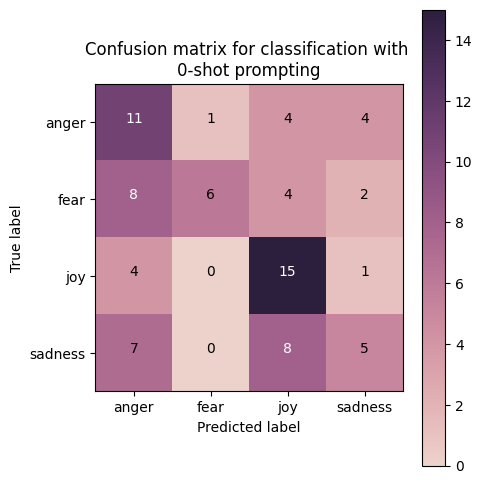

In [72]:
# 如果看到 '429 RESOURCE_EXHAUSTED' 錯誤，沒關係，等到資料被處理，它會持續重試直到完成

# 使用零樣本提示執行實驗的範例
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: As your own lives in order to complete our amazing life journey successfully, it is there. #bitter
Class: anger

Text: @jjskeffington @foodbelfast I dread to think!
Class: fear

Text: @Nick_Offerman I'll be there!! Can't wait for all the #mirth!
Class: joy

Text: Sister: (Canadian player does something shady.) Jonathan Toews is frowning and he doesn't know why. #WorldCupOfHockey
Class: sadness




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:11<00:03,  1.40it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.70 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:06,  1.51it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.21 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.50 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.58 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<00:04,  1.14it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.80 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:52<00:00,  5.62s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 55.00%
              precision    recall  f1-score   support

       anger       0.47      0.80      0.59        20
        fear       0.90      0.45      0.60        20
         joy       0.57      0.60      0.59        20
     sadness       0.47      0.35      0.40        20

    accuracy                           0.55        80
   macro avg       0.60      0.55      0.54        80
weighted avg       0.60      0.55      0.54        80



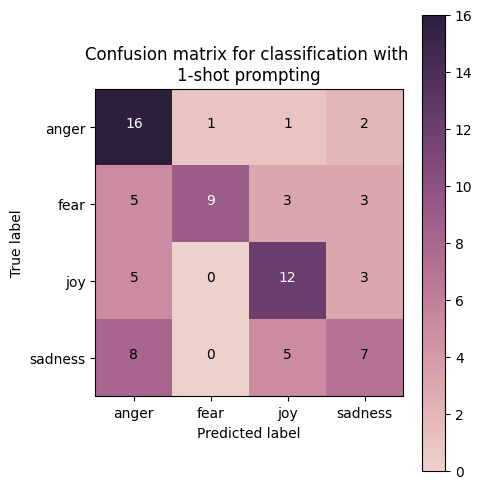

In [73]:
# 如果看到 '429 RESOURCE_EXHAUSTED' 錯誤，沒關係，等到資料被處理，它會持續重試直到完成

# 使用 1-樣本提示執行實驗的範例
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: Women don't like girls because we resent them for looking so great/we wish we still looked like that  #washed
Class: anger

Text: Because it was a perfect illusion, but at least now I know what it was. #angry #ladygaga #iscalming#mysoul
Class: anger

Text: Realizing that holding a grudge for long is immaturity is wisdom
Class: anger

Text: @JohnKerry can be as indignant as he wants but the world knows Obama will do nothing and Putin will just do what he wants #Aleppo #Syria
Class: anger

Text: @ArcadianLuthier -- taking out his feelings on Kei unfairly. His lips form a frown as he tries to walk away.
Class: anger

Text: Ha! @mquirk @joshuahoodbooks Got your book after our 'meeting' at the Starbucks in NOLA. If Josh says it's terrific, I'm all in.
Class: fear

Text: Not sure that men can han

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:11<00:04,  1.25it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.49 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:07,  1.35it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.26 seconds.
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
Error occurred when generating response, error: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:04<00:14,  1.04it/s]

Rate limit of 15 requests per minute reached. Waiting for 41.79 seconds.


Processing samples for emotion: joy...:  35%|███▌      | 7/20 [00:48<02:15, 10.43s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 38.283506674s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash-l

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 33.64 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:45<00:04,  1.18it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.58 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:37<00:00,  4.88s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 58.75%
              precision    recall  f1-score   support

       anger       0.47      0.70      0.56        20
        fear       0.75      0.45      0.56        20
         joy       0.75      0.75      0.75        20
     sadness       0.50      0.45      0.47        20

    accuracy                           0.59        80
   macro avg       0.62      0.59      0.59        80
weighted avg       0.62      0.59      0.59        80



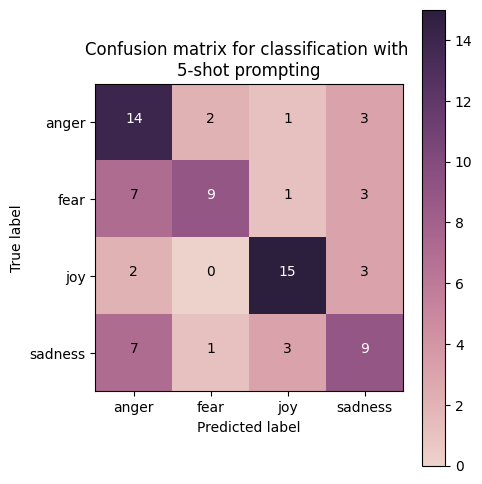

In [ ]:
# 如果看到 '429 RESOURCE_EXHAUSTED' 錯誤，沒關係，等到資料被處理，它會持續重試直到完成

# 使用 5-樣本提示執行實驗的範例
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

---

##### <a id='toc1_5_10_1_1_'></a>[**>>> 練習 6（課後作業）：**](#toc0_)

比較並討論零次射擊、一次射擊和五次射擊分類的整體結果。

### Answer here
整體表現隨著提供示例數從 0-shot 到 5-shot 穩定上升：整體準確率由 46.25% 提升到 55.00% 再到 58.75%，macro F1 也從 0.45 到 0.54 到 0.59，顯示小樣本示例能有效校正模型決策邊界並提升類別均衡性。

類別層面來看，joy 的召回在三種設定都維持高檔（0.75、0.60、0.75），且在 5-shot 時 precision 與 recall 同為 0.75，顯示該類別最易被模型穩定識別；相對地，sadness 的召回最不穩定，雖在 5-shot 有改善但仍落後其他類別，暗示該類別特徵與其他情緒（特別是 anger、joy）的混淆仍明顯。

從混淆矩陣觀察，0-shot 時 anger 常被誤判為 joy 或 sadness，而 fear 與 sadness 彼此與 joy 有較多交叉；加入 1-shot 後，anger 的正確預測顯著增加，但 joy 的正確數略降，顯示單一示例偏向強化了對怒的識別模板；進一步到 5-shot，joy 的真陽性回到 15，anger、fear、sadness 的誤分類分佈更平均，總體混淆減少，說明多樣示例有助於校正偏置與邊界模糊區。

Overall performance steadily improved as the number of examples provided increased from 0-shot to 5-shot: overall accuracy increased from 46.25% to 55.00% and then to 58.75%, while macro F1 also improved from 0.45 to 0.54 and then to 0.59, demonstrating that smaller sample sizes effectively corrected the model's decision boundaries and improved class balance.

At the category level, the recall for "joy" remained high across all three settings (0.75, 0.60, 0.75), and both precision and recall were 0.75 at 5-shot, indicating that this category was the most easily and stably identified by the model. Conversely, the recall for "sadness" was the least stable; although it improved at 5-shot, it still lagged behind other categories, suggesting that this category's features were still significantly confused with other emotions (especially anger and joy).

Observing the confusion matrix, in the 0-shot, anger was often misclassified as joy or sadness, while fear and sadness had more overlap with joy. After adding the 1-shot, the correct prediction of anger increased significantly, but the correct number of joy decreased slightly, indicating that a single example tends to reinforce the recognition template of anger. Further, in the 5-shot, the true positive of joy returned to 15, and the misclassification distribution of anger, fear, and sadness became more even, with overall confusion decreasing, indicating that diverse examples help to correct bias and boundary ambiguity.



---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

---

##### <a id='toc1_5_10_1_2_'></a>[**>>> 練習 7（家庭作業）：**](#toc0_)

**案例研究：** 檢查 `results/llm_classification_results` 目錄中的結果文件，找出**隨著樣本數量增加，文本分類效果提升的情況**（預測情緒隨著樣本數量增加而正確），**分類效果沒有提升的情況**（預測情感始終從正確情況變為錯誤）**（情緒預測而下降的**（情緒預測情緒）。為此，你需要使用 pandas 載入結果，並使用其資料框函數處理資料。討論你的發現。

In [76]:
import pandas as pd
import os
from pathlib import Path

# 讀取所有結果檔案 (Load all results files)
results_dir = './results/llm_classification_results'
files = sorted([f for f in os.listdir(results_dir) if f.endswith('.csv')])

# 合併所有結果 (Merge all results)
dfs = {}
for file in files:
    shot_count = file.split('_')[-1].replace('.csv', '')
    df = pd.read_csv(os.path.join(results_dir, file))
    dfs[shot_count] = df

# 建立比較數據框 (Create comparison DataFrame)
comparison = pd.DataFrame()
comparison['Index'] = dfs['0'].index
comparison['Text'] = dfs['0']['text'].values
comparison['True_Emotion'] = dfs['0']['true_emotion'].values
comparison['0-shot'] = dfs['0']['predicted_emotion'].values
comparison['1-shot'] = dfs['1']['predicted_emotion'].values
comparison['5-shot'] = dfs['5']['predicted_emotion'].values

# 檢查預測是否正確 (Check if predictions are correct)
comparison['0-shot_correct'] = comparison['0-shot'] == comparison['True_Emotion']
comparison['1-shot_correct'] = comparison['1-shot'] == comparison['True_Emotion']
comparison['5-shot_correct'] = comparison['5-shot'] == comparison['True_Emotion']

# 分類案例 (Categorize cases)
improved = comparison[(~comparison['0-shot_correct']) & (comparison['1-shot_correct'])]
no_improvement = comparison[(~comparison['0-shot_correct']) & (~comparison['1-shot_correct']) & (~comparison['5-shot_correct'])]
degraded = comparison[(comparison['0-shot_correct']) & (~comparison['5-shot_correct'])]

print("=== 分類效果分析 (Classification Performance Analysis) ===\n")
print(f"效果提升的案例（0-shot 錯誤 (Wrong) → 1-shot 正確 (Correct)）(Improved cases): {len(improved)} 個")
print(f"效果未改善的案例（始終錯誤 (Always Wrong)）(No improvement cases): {len(no_improvement)} 個")
print(f"效果下降的案例（0-shot 正確 (Correct) → 5-shot 錯誤 (Wrong)）(Degraded cases): {len(degraded)} 個\n")

# 效果提升的案例 (Improved cases)
print("--- 效果提升的案例 (Improved Cases - Wrong → Correct) ---")
if len(improved) > 0:
    for idx, row in improved.head(3).iterrows():
        print(f"文本 (Text)：{row['Text'][:50]}...")
        print(f"  真實 (True)：{row['True_Emotion']}, 0-shot：{row['0-shot']} (錯誤/Wrong), 1-shot：{row['1-shot']} (正確/Correct)\n")

# 效果未改善的案例 (No improvement cases)
print("--- 效果未改善的案例（始終錯誤/Always Wrong）(No Improvement Cases) ---")
if len(no_improvement) > 0:
    for idx, row in no_improvement.head(3).iterrows():
        print(f"文本 (Text)：{row['Text'][:50]}...")
        print(f"  真實 (True)：{row['True_Emotion']}, 0-shot：{row['0-shot']} (錯誤/Wrong), 1-shot：{row['1-shot']} (錯誤/Wrong), 5-shot：{row['5-shot']} (錯誤/Wrong)\n")

# 效果下降的案例 (Degraded cases)
print("--- 效果下降的案例 (Degraded Cases - Correct → Wrong) ---")
if len(degraded) > 0:
    for idx, row in degraded.head(3).iterrows():
        print(f"文本 (Text)：{row['Text'][:50]}...")
        print(f"  真實 (True)：{row['True_Emotion']}, 0-shot：{row['0-shot']} (正確/Correct), 5-shot：{row['5-shot']} (錯誤/Wrong)\n")

# 整體統計 (Overall Statistics)
print("=== 整體統計 (Overall Statistics) ===")
total = len(comparison)
for shot in ['0-shot', '1-shot', '5-shot']:
    accuracy = comparison[f'{shot}_correct'].sum() / total * 100
    print(f"{shot} 準確率 (Accuracy)：{accuracy:.2f}%")


=== 分類效果分析 (Classification Performance Analysis) ===

效果提升的案例（0-shot 錯誤 (Wrong) → 1-shot 正確 (Correct)）(Improved cases): 10 個
效果未改善的案例（始終錯誤 (Always Wrong)）(No improvement cases): 15 個
效果下降的案例（0-shot 正確 (Correct) → 5-shot 錯誤 (Wrong)）(Degraded cases): 12 個

--- 效果提升的案例 (Improved Cases - Wrong → Correct) ---
文本 (Text)：Might just leave and aggravate bae...
  真實 (True)：anger, 0-shot：sadness (錯誤/Wrong), 1-shot：anger (正確/Correct)

文本 (Text)：@fluffysoftlouis no no. I insist that you give me ...
  真實 (True)：anger, 0-shot：joy (錯誤/Wrong), 1-shot：anger (正確/Correct)

文本 (Text)：Everybody talking about 'the first day of fall' bu...
  真實 (True)：anger, 0-shot：joy (錯誤/Wrong), 1-shot：anger (正確/Correct)

--- 效果未改善的案例（始終錯誤/Always Wrong）(No Improvement Cases) ---
文本 (Text)：At school, my classmate is with me at music class ...
  真實 (True)：fear, 0-shot：joy (錯誤/Wrong), 1-shot：joy (錯誤/Wrong), 5-shot：anger (錯誤/Wrong)

文本 (Text)：@All4 is the android app it designed to be buggy a...
  真實 (True)：fear, 0-shot：anger (

---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

### <a id='toc1_5_11_'></a>[**2.7 額外 LLM 相關資料：**](#toc0_)

實驗部分到此結束，如果您想進一步探索，這裡還有一些額外的材料：

- **如何使用 OpenAI ChatGPT 模型的 API（非免費 API）：** [基礎影片](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [基礎 GitHub 倉庫](https://github.com/gkamradt/langchain-tutorials/blob/mainimmm/Chatm/ [RAG 的基礎影片](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG 的基礎GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **進階主題 - QLoRA（量化低秩適配器）：** QLoRA 是一種用於提高大型語言模型微調效率的方法。它的工作原理是在預訓練模型中添加一個較小的可訓練部分（LoRA），同時保持模型的其餘部分不變。此外，它還使用稱為量化的過程來減小模型的資料量，從而降低模型所需的記憶體。這使得您無需消耗大量運算資源即可微調大型模型，從而更輕鬆地將模型適配到特定任務中。資料：[論文 GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 應用影片](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 應用GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **如何使用 `unsloth` 庫微調和運行本地 LLM：** [unsloth 教程](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google 智能體開發工具包 (ADK) 文件：** [ADK](https://google.github.io/adk-docs/)

- **建立 AI 智能體**使用 LangGraph：** [LangGraph 文件](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---